# Harmonic oscillator

The aim of this code is to reproduce the example for the harmonic oscillator on the official site for the quantum optics toolbox https://qojulia.org/

In [ ]:
using QuantumOptics 

After loading the module, the first step is to define a basis in space and momentum, and the Hamiltonian for the Harmonic oscillator which is $$H = \frac{p^2}{2m} + \frac{1}{2}m\omega^2 x^2$$

In [ ]:
basis = PositionBasis(-3,3,128)
x = position(basis)
p = momentum(basis)

ω = √1.5
m=2
H = p^2/(2m) + 0.5m*ω^2*x^2

We can find the eigenstates and the eigenvalues with the function eigenstate(A,n) where A is the operator and n is the number of eigenstates-values we want. A must be hermitian, but due to numerical error it's not always true, even if theoretically the operator is hermitian. We can use a trick to avoid thus numerical error by making the operator hermitian via $A' = (A + A^\dagger)/2$
We can also calculate the expectation value of the operator with the function expect() 

In [ ]:
Ev,ϕ = eigenstates((H+dagger(H))/2,5) # only the lowest 5 eigenvalues
# H is not hermitian due to numerical error => trick to make it hermitian (H+dagger(H))/2

xq = real(expect(x,ϕ))
pq = real(expect(p,ϕ))
Δx = sqrt.(real(expect(x^2,ϕ)))
Δp = sqrt.(real(expect(p^2,ϕ)))

println(Δx.*Δp) # the ground state has the minimum uncertanty h/2 = 0.5

We can easily plot the eigenstate with the module PyPlot

[0.5, 1.5, 2.5, 3.50001, 4.49986]


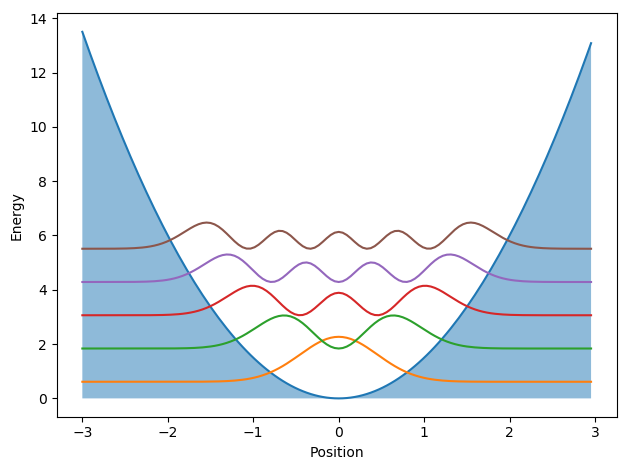

In [1]:
using PyPlot
# using Plots => for animation
xpoints = samplepoints(basis)
plot(xpoints, 0.5m*ω^2*xpoints.^2)
fill_between(xpoints, 0., 0.5m*ω^2*xpoints.^2, alpha=0.5) #coloriamo!
for i=1:length(ϕ)
    plot(xpoints, abs2.(ϕ[i].data)*40 + Ev[i]) #shift of wavefunction and streatching to make the plot looks good
end
xlabel("Position")
ylabel("Energy")
tight_layout()